<a href="https://colab.research.google.com/github/therudradev/Python_Programming/blob/main/session_21_multiindex_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

because we can show higher dimension objects to lower dimension objects like data frame,like series.

In [5]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

,0
"(cse, 2019)",1
"(cse, 2020)",2
"(cse, 2021)",3
"(cse, 2022)",4
"(ece, 2019)",5
"(ece, 2020)",6
"(ece, 2021)",7
"(ece, 2022)",8


In [6]:
# The problem?
a['cse']

KeyError: 'cse'

In [11]:
# The solution -> multiindex series(also known as Hierarchical Indexing)
# multiple index levels within a single index

In [12]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
# multiindex.levels
multiindex.levels[1]
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [13]:
# level inside multiindex object

In [14]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [15]:
# how to fetch items from such a series
s['cse']

,0
2019,1
2020,2
2021,3
2022,4


In [16]:
# a logical question to ask

In [17]:
# unstack
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [18]:
# stack
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [19]:
# Then what was the point of multiindex series?

In [20]:
# multiindex dataframe

In [21]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [22]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [23]:
# Are columns really different from index?

In [24]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [25]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [26]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Stacking and Unstacking

stack: remove column and make row <br>
unstack: remove row and make column

In [27]:
# unstack on multi-index on column
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [29]:
branch_df1.unstack().unstack()  #now its become a series

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [30]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [31]:
branch_df2.stack()

/tmp/ipython-input-3132666484.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack()


delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [32]:
branch_df2.stack().stack() # now its become series

/tmp/ipython-input-2582868202.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack() # now its become series


2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

In [33]:
branch_df3.stack().stack()

/tmp/ipython-input-4023844418.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
                        mumbai     0
     2022  avg_package  delhi     15
                        mumbai     0
           students     delhi     16
                        mumbai     0
dtype: int64

### Working with multiindex dataframes

In [34]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 632.0+ bytes


In [35]:
# duplicated
branch_df3.duplicated() #check the row duplicated or not

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [36]:
# isnull
branch_df3.isnull() #check for the null value

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [37]:
# Extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [38]:
# multiple
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [39]:
# using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [40]:
# Extracting cols
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [41]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [42]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [43]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True]) #level 0 in desecding and level 1 in asecending
branch_df3.sort_index(level=1,ascending=[False]) #sorting on particular level, level 1

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [44]:
# multiindex dataframe(col) -> transpose
# transpose row become column and column become row
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [45]:
# swaplevel
branch_df3.swaplevel # Rowise swaping
branch_df3.swaplevel(axis=1) #columnwise swaping

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
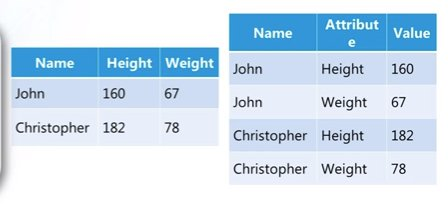

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [46]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [47]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [48]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [50]:
# melt -> real world example
death = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [51]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [52]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [53]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [54]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [55]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Question: average total bill based on gender.
df.groupby('sex')[['total_bill']].mean()

/tmp/ipython-input-2722588061.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [59]:
# find avg bill of smoker based on gender.
# df.groupby(['sex','smoker'])[['total_bill']].mean() #this will give in multi-index
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

/tmp/ipython-input-884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

##The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table.
(we can do same things by groupby and unstack/stack method.)

*   if we does not pass the aggrigate function then it will take means as default.

In [6]:
# rather than using upward groupby code we can use pivot table.
df.pivot_table(index='sex',columns='smoker',values='total_bill')

/tmp/ipython-input-4061770518.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

/tmp/ipython-input-1799809698.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [14]:
# if we don't provide any values it will show the mean of all numerical column; but not working in latest pandas
# all cols together
# df.pivot_table(index='sex',columns='smoker')['size']
df.pivot_table(index='sex',columns='smoker', values=['total_bill', 'tip', 'size'])

/tmp/ipython-input-2661765855.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker', values=['total_bill', 'tip', 'size'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [19]:
# multidimensional
# df.pivot_table(index=['sex','smoker'],columns=['day','time'],values=['total_bill', 'tip', 'size']) # 5D data
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

/tmp/ipython-input-2742674502.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [21]:
# margins (use the see the total sum)
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

/tmp/ipython-input-678292465.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [23]:
# plotting graphs
df = pd.read_csv('/content/expense_data.csv')

In [24]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [25]:
df['Category'].value_counts()

,count
Category,
Food,156
Other,60
Transportation,31
Apparel,7
Household,6
Allowance,6
Social Life,5
Education,1
Salary,1


## question: we have to see month by month expnseve.
* first we have to extract the date.

In [26]:
df.info() #we can see that date is in string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [27]:
df['Date'] = pd.to_datetime(df['Date']) #for conversion into date and date and time

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [31]:
df['month'] = df['Date'].dt.month_name()

In [32]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [34]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [35]:
# fill_value is use to replace the NaN with zero.
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='month'>

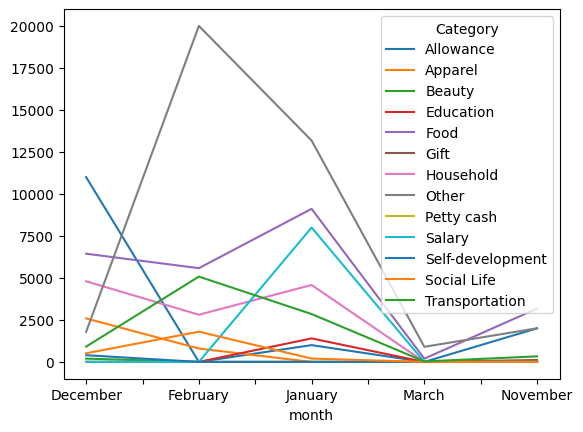

In [36]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

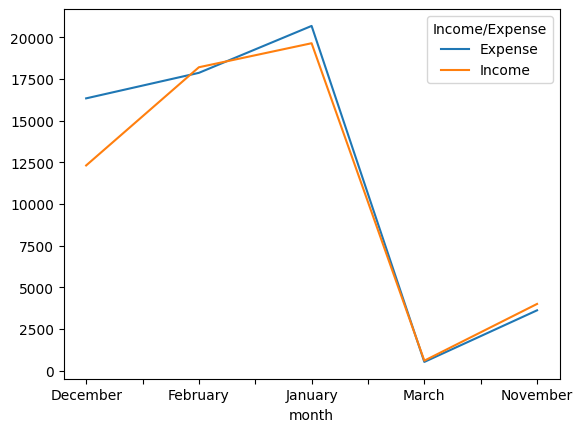

In [37]:
# in Income/Expense column
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

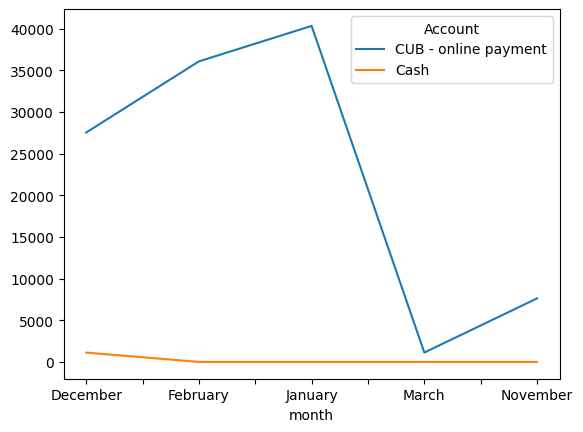

In [38]:
# graph on column Account
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

# ⭐ **MULTIINDEX (Hierarchical Indexing) – Pandas Study Notes**

---

# 🔵 **1. What is a MultiIndex?**

A **MultiIndex** (hierarchical index) is an index with **multiple levels**.

Example:
Row index = *(State, City)*
Column index = *(Year, Quarter)*

---

# 🔵 **2. Why Do We Need MultiIndex?**

MultiIndex helps when:

* Data has **multiple keys** (e.g., State → City)
* You want to represent **higher-dimensional data in 2D**
* You want to perform **grouping, reshaping, pivoting**
* You need **cleaner hierarchical structure** in DataFrames

Makes the DataFrame more **organized, powerful, and compact**.

---

# 🔵 **3. MultiIndex in Series (Hierarchical Series)**

Example:

```python
s = pd.Series(
    [10, 20, 30],
    index=[['India','India','USA'],['Delhi','Mumbai','NYC']]
)
```

This is a **Series with MultiIndex** (2 levels).

### ✔ Accessing data

```python
s['India']
s['India', 'Delhi']
```

---

# 🔵 **4. MultiIndex DataFrame (Rows)**

DataFrame with multiple row index levels:

```python
df = df.set_index(['State', 'City'])
```

Levels:

* Level 0 → State
* Level 1 → City

---

# 🔵 **5. MultiIndex DataFrame (Columns Perspective)**

Columns can also be MultiIndex:

Example (pivot output):

```
           Sales
Year   2020   2021
City
Delhi   120    140
Mumbai  100    130
```

Column levels:

1. Year
2. Metric (Sales)

---

# 🔵 **6. MultiIndex for BOTH Rows & Columns**

You can have MultiIndex rows **and** MultiIndex columns at the same time.

Example:
Rows = *State → City*
Columns = *Year → Quarter*

---

# 🔵 **7. STACK & UNSTACK (Reshaping Dimensions)**

### ✔ `unstack()` → Index → Columns

Converts **row-level** to **column-level** (wider data).

```python
df.unstack()
```

### ✔ `stack()` → Columns → Index

Converts **columns** to **row-level** (longer data).

```python
df.stack()
```

### ✔ Why they matter?

They **change the dimension/hierarchy** of the DataFrame.

---

# 🔵 **8. Are Columns Really Different from Index?**

**No.**
From Pandas internal design:

* Row index and column index are nearly the same data structure
* Both are **Index objects**
* Both support:

  * MultiIndex
  * Names
  * Levels
  * Sorting

---

# 🔵 **9. Viewing MultiIndex DataFrame (head/tail)**

```python
df.head()
df.tail()
```

Same as normal DataFrame, just shows hierarchical index.

---

# 🔵 **10. INFO & SHAPE With MultiIndex**

```python
df.info()
df.shape
```

* Shape → shows normal `(rows, columns)`
* Info → shows MultiIndex structure

---

# 🔵 **11. duplicated() / isnull() with MultiIndex**

### ✔ Check duplicates in MultiIndex:

```python
df.index.duplicated()
```

### ✔ Check missing values:

```python
df.isnull()
```

---

# 🔵 **12. Extracting Rows (Single & Multiple)**

### ✔ Single Row:

```python
df.loc[('India', 'Delhi')]
```

### ✔ Multiple rows (slice):

```python
df.loc['India']
df.loc[('India', slice(None))]
```

### ✔ `.iloc` for positional indexing:

```python
df.iloc[0]        # first row
df.iloc[0:3]      # first 3 rows
```

---

# 🔵 **13. Extracting Columns**

Normal:

```python
df['Sales']
```

For MultiIndex columns:

```python
df[('2020', 'Sales')]
```

---

# 🔵 **14. Extracting Both Rows and Columns**

```python
df.loc[('India', 'Delhi'), ('2020', 'Sales')]
```

---

# 🔵 **15. Sorting MultiIndex — `sort_index()`**

### ✔ Sort all levels:

```python
df.sort_index()
```

### ✔ Descending:

```python
df.sort_index(ascending=False)
```

### ✔ Different order per level:

```python
df.sort_index(level=[0,1], ascending=[True, False])
```

### ✔ Sort by one level only:

```python
df.sort_index(level=1)
```

---

# 🔵 **16. Transpose MultiIndex Column DF**

If columns are multi-indexed:

```python
df.T       # transpose
```

This swaps row ↔ column MultiIndex.

---

# 🔵 **17. swaplevel()**

Swap positions of MultiIndex levels.

```python
df.swaplevel(0, 1)
```

Useful before sorting.

---

# 🔵 **18. Wide vs Long Data Format**

| Format   | Meaning                                       |
| -------- | --------------------------------------------- |
| **Wide** | Many columns, fewer rows (e.g., pivot tables) |
| **Long** | Fewer columns, more rows (tidy format)        |

---

# 🔵 **19. `melt()` → Wide to Long**

Converts wide format → long (tidy) format.

```python
pd.melt(df, id_vars=['Name'], var_name='Year', value_name='Sales')
```

Useful for plotting & ML preprocessing.

---

# ⭐ **QUICK SUMMARY (One-Liner Revision)**

* **MultiIndex** → hierarchy of index/columns
* **Needed** when data has multiple keys
* **stack** = wide → long
* **unstack** = long → wide
* **swaplevel** = swap index levels
* **sort_index** = sort by level
* **iloc** = position-based extraction
* **loc** = label-based extraction
* **melt** = wide → long
* MultiIndex usable for both **rows & columns**
* Columns and index are internally similar

---